RAINFALL PREDICTION USING SIMPLE RNN

Importing Libraries

In [100]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
from tensorflow.keras.layers import SimpleRNN
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import os


Importing dataset

In [101]:
dataset=pd.read_csv(r"C:\Users\DELL\Downloads\rainfall in india 1901-2015.csv",encoding = "ISO-8859-1")
dataset.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [102]:
dataset.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [103]:
groups = dataset.groupby('SUBDIVISION')[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
data = groups.get_group('BIHAR')
data.head()



,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
897,1901,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,8.3,7.3,0.1
898,1902,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,28.5,1.1,0.0
899,1903,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,147.0,0.1,0.0
900,1904,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,98.1,10.6,3.8
901,1905,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,11.6,0.0,0.6


In [104]:
data=data.melt(['YEAR']).reset_index()
data.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
1,1,1902,JAN,4.6
2,2,1903,JAN,5.3
3,3,1904,JAN,6.3
4,4,1905,JAN,16.0


In [105]:
df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [106]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6
575,575,1901,JUN,66.3
690,690,1901,JUL,245.9
805,805,1901,AUG,319.4
920,920,1901,SEP,155.1
1035,1035,1901,OCT,8.3


In [107]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,51.8
115,115,1901,2,19.6
230,230,1901,3,11.9
345,345,1901,4,1.1
460,460,1901,5,65.6
575,575,1901,6,66.3
690,690,1901,7,245.9
805,805,1901,8,319.4
920,920,1901,9,155.1
1035,1035,1901,10,8.3


In [108]:
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df.head(12)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,51.8,1901-01-01
115,115,1901,2,19.6,1901-02-01
230,230,1901,3,11.9,1901-03-01
345,345,1901,4,1.1,1901-04-01
460,460,1901,5,65.6,1901-05-01
575,575,1901,6,66.3,1901-06-01
690,690,1901,7,245.9,1901-07-01
805,805,1901,8,319.4,1901-08-01
920,920,1901,9,155.1,1901-09-01
1035,1035,1901,10,8.3,1901-10-01


In [109]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [110]:
series=dataset
series.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [111]:
series.shape

(1380, 1)

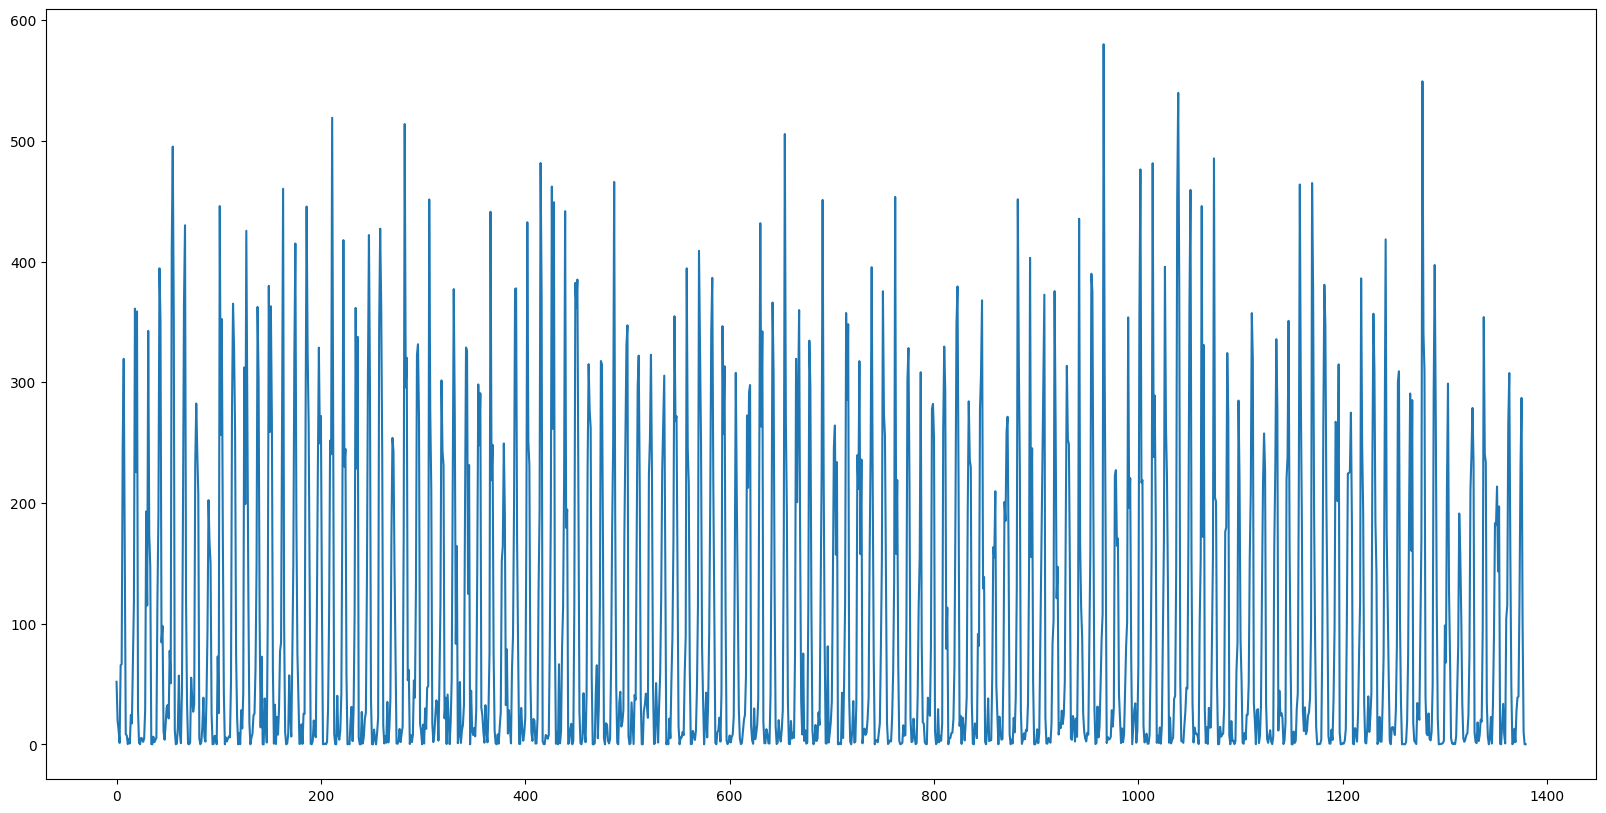

In [112]:
pyplot.figure(figsize=(20,10))
pyplot.plot(series.values)
pyplot.show()

In [113]:
# Get the raw data values from the pandas data frame.
data_raw = series.values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

# Print a few values.
dataset[0:5]

array([[0.08929496],
       [0.03378728],
       [0.02051371],
       [0.00189622],
       [0.11308396]], dtype=float32)

In [114]:
# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1104, 276)


In [115]:
# FIXME: This helper function should be rewritten using numpy's shift function. See below.
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [116]:
# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1102, 1)
New training data shape:
(1102, 1, 1)


MOdel Building

In [117]:
def fit_model(train_X, train_Y, window_size=1):
    model = Sequential()
    
    model.add(SimpleRNN(2000, activation='tanh', input_shape=(12, window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")
    
    model.fit(train_X, train_Y, epochs=10, batch_size=64)
    
    return model

# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)



C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0852
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0359
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0412
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0379
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0369
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0343
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0333
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0323
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0355
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0363


In [118]:
import math
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Training data score: 107.70 RMSE
Test data score: 96.28 RMSE


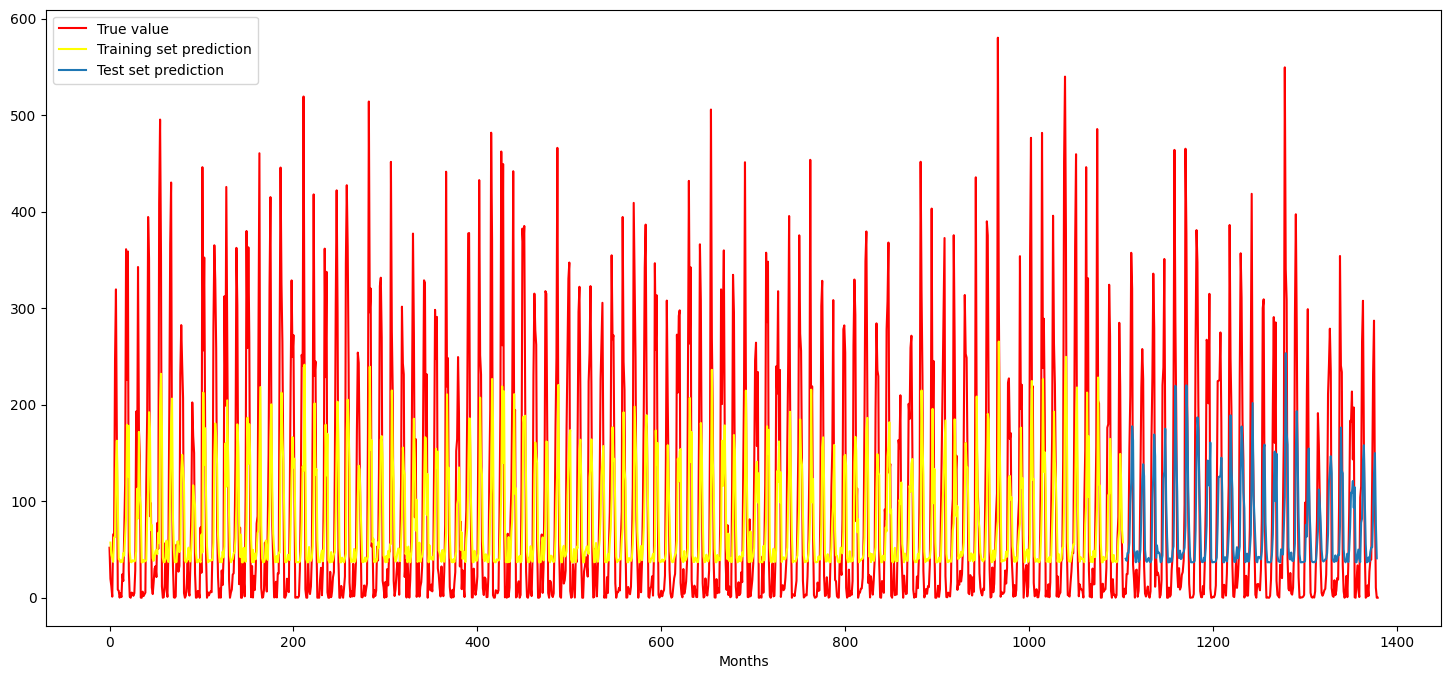

In [119]:
# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='red')
plt.plot(train_predict_plot, label = "Training set prediction",color='yellow')
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")


plt.legend()
plt.show()

In [120]:
test_predict

array([[ 40.407516],
       [ 38.27857 ],
       [ 46.360718],
       [ 46.360718],
       [ 56.84795 ],
       [ 97.73295 ],
       [119.14122 ],
       [177.56625 ],
       [162.86224 ],
       [ 50.224422],
       [ 44.310616],
       [ 36.741   ],
       [ 47.858902],
       [ 48.174305],
       [ 37.095825],
       [ 39.461308],
       [ 49.59362 ],
       [ 88.31006 ],
       [122.53179 ],
       [138.26225 ],
       [126.00121 ],
       [ 49.67247 ],
       [ 38.436256],
       [ 37.17468 ],
       [ 39.382465],
       [ 41.274876],
       [ 37.490067],
       [ 36.741   ],
       [ 39.34305 ],
       [100.92647 ],
       [126.395454],
       [169.05144 ],
       [146.7384  ],
       [ 41.19602 ],
       [ 54.206413],
       [ 46.084736],
       [ 46.952114],
       [ 45.256813],
       [ 36.780434],
       [ 37.884315],
       [ 43.876923],
       [123.47799 ],
       [130.7322  ],
       [175.04337 ],
       [100.768776],
       [ 62.801258],
       [ 36.701565],
       [ 36.7

In [121]:
train_predict


array([[ 57.123917],
       [ 44.42888 ],
       [ 41.39315 ],
       ...,
       [123.12318 ],
       [ 70.568214],
       [ 57.360477]], dtype=float32)

In [122]:
import numpy as np
from datetime import timedelta

window_size = 1

# Get the last `window_size` values from the dataset for prediction
last_values = dataset[-window_size:]

# Reshape the data to match the input shape of the model (samples, time steps, features)
last_values_reshaped = np.reshape(last_values, (1, 1, window_size))

# Predict the next value
predicted_scaled = model1.predict(last_values_reshaped)

# Inverse transform the predicted value to get it back to the original scale
predicted = scaler.inverse_transform(predicted_scaled)

print(f"Predicted next year's April rainfall: {predicted[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted next year's April rainfall: 36.701560974121094
